In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True)

In [3]:
# makes inline plots to have better quality
%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("seaborn") 

### Read the data and rename columns 

In [4]:
df = pd.read_excel("sounds_data.xlsx")

In [5]:
df.columns

Index(['Timestamp', 'Score', 'Your Age ', 'Your gender',
       'Your education level (finished)', 'Your country of origin',
       'Have you passed similar kinds of test before?', 'Your English level',
       'Have you ever studied music?', 'Have you ever worked on/studied AI?',
       'Speech: https://drive.google.com/open?id=1YMc5xaHjKbMWPXcapWkZNFKMX64Y58my',
       'In your opinion, how many people will say that it is said by human ? [I say:]',
       'Speech: https://drive.google.com/open?id=1Hrg7FinYpyRaiqUAhaZhz4YdZQ4S14Vc',
       'In your opinion, how many people will say that it is said by human ? [I say:].1',
       'Speech: https://drive.google.com/open?id=1HWdwu1R1mxgZXHKFy8XOdb-rBw-70fWv',
       'In your opinion, how many people will say that it is said by human ? [I say:].2',
       'Speech: https://drive.google.com/open?id=13SuM3b1fxmguCU5VLREh-aUZLRrCJo4V',
       'In your opinion, how many people will say that it is said by human ? [I say:].3',
       'Piano: https:

In [6]:
len(df.columns)

26

In [7]:
column_names = ['ts', 'score', 'age', 'gender', 'education', 'country', 'similar_tests', 'english_level','music_level','studied_AI']

In [8]:
for i in range(1,9):
    column_names.append("q" + str(i))
    column_names.append("wc" + str(i))

In [9]:
df.columns = column_names

In [10]:
df

,ts,score,age,gender,education,country,similar_tests,english_level,music_level,studied_AI,...,q4,wc4,q5,wc5,q6,wc6,q7,wc7,q8,wc8
0,2019-12-23 14:28:32.180,1,31,F,High school,Estonia,No,Proficient/Advanced,No,No,...,Probably yes,0.8,I don't know,0.7,Probably yes,0.7,Probably yes,0.7,Probably no,0.7
1,2019-12-23 14:49:29.867,3,25,F,Bachelor's,Russia,No,Proficient/Advanced,No,Yes,...,Definitely no,0.1,Probably no,0.2,Probably yes,0.3,Definitely yes,0.3,Probably no,0.3
2,2019-12-23 15:12:50.889,5,24,F,Master's,Russia,Yes,Upper-Intermediate/Intermediate,No,Yes,...,Definitely no,0.3,Probably no,0.4,Probably yes,0.8,I don't know,0.0,Probably yes,0.9
3,2019-12-23 19:50:47.685,4,28,M,Master's,India,Yes,Proficient/Advanced,No,No,...,Definitely yes,0.8,Definitely no,0.0,Definitely no,0.7,Definitely yes,0.7,Definitely yes,0.8
4,2019-12-23 21:20:37.709,3,30,F,Master's,Estonia,No,Proficient/Advanced,Yes (amateur),No,...,Probably no,0.6,Probably yes,0.7,Probably no,0.5,Probably no,0.5,Definitely no,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2020-01-11 22:57:37.746,5,25,F,Bachelor's,Estonia,No,Proficient/Advanced,Yes (amateur),No,...,Probably no,0.6,Probably no,0.6,Probably no,0.4,Probably yes,0.5,Probably yes,0.7
60,2020-01-12 14:12:29.844,3,26,M,Master's,Estonia,No,Upper-Intermediate/Intermediate,Yes (professionally),Yes,...,Probably yes,0.6,Probably yes,0.6,Probably no,0.4,Probably yes,0.6,I don't know,0.5
61,2020-01-13 12:13:57.370,3,29,F,Master's,Barbados,No,Native,Yes (amateur),No,...,Probably yes,0.6,Probably yes,0.8,Probably no,0.5,Probably yes,0.7,Probably no,0.8
62,2020-01-13 13:10:49.286,4,39,F,Master's,Estonia,No,Upper-Intermediate/Intermediate,No,No,...,Probably no,0.2,Probably no,0.3,Probably no,0.1,Probably yes,0.8,Probably yes,0.8


# Plots

### General

#### 1. Time graph

In [11]:
df['date'] = df['ts'].dt.date

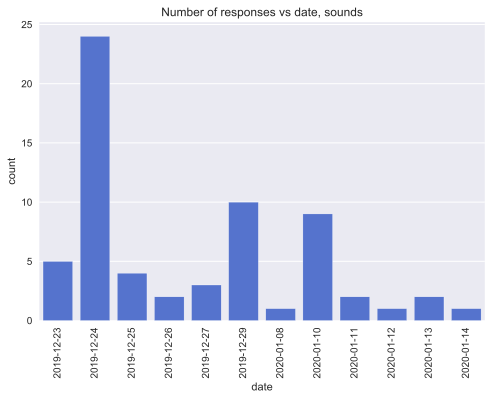

In [12]:
hist = sns.countplot(x = 'date',
              data = df,
              #order = df['date'].value_counts().index,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Number of responses vs date, sounds")
plt.show()

#### 2. Age distribution

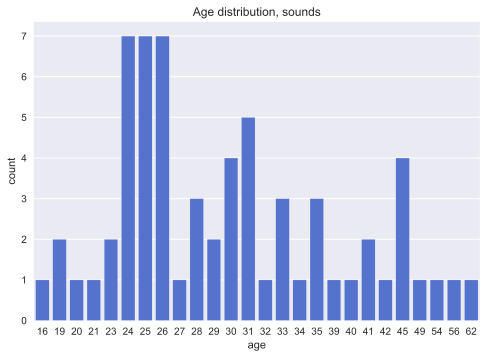

In [13]:
sns.countplot(df['age'], color="royalblue")
plt.title('Age distribution, sounds')
plt.show()

#### 3. Worked on/studied AI

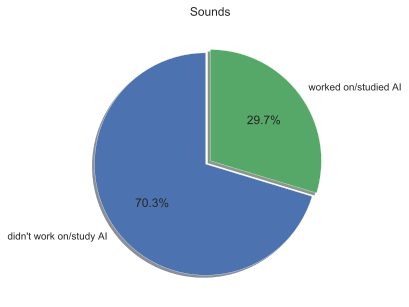

In [14]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['studied_AI'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Sounds")
plt.show()

#### 4. Passed similar tests before

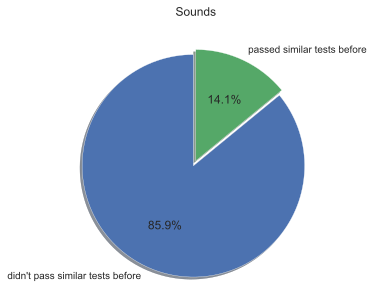

In [15]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['similar_tests'].value_counts(),explode=(0.05,0),labels=["didn't pass similar tests before","passed similar tests before"], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Sounds")
plt.show()

#### 5. Country of origin histogram

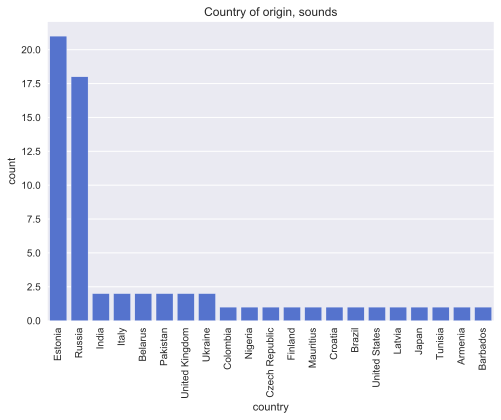

In [16]:
hist = sns.countplot(x = 'country',
              data = df,
              order = df['country'].value_counts().index,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Country of origin, sounds")
plt.show()

#### 6. English level

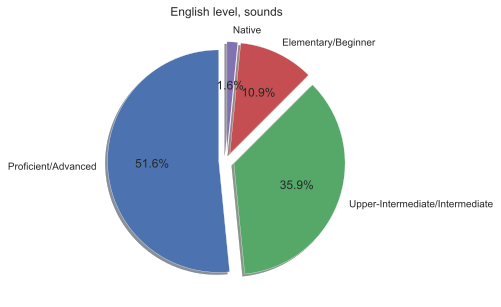

In [17]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['english_level'].value_counts(),explode=(0.07,0.07,0.07,0.07),labels=["Proficient/Advanced",
                                                                                "Upper-Intermediate/Intermediate",
                                                                                "Elementary/Beginner",
                                                                                "Native"],
       autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.title("English level, sounds")
plt.show()

#### 7. Music level

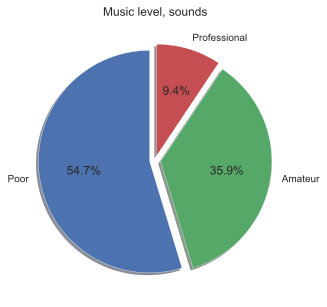

In [18]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['music_level'].value_counts(),explode=(0.05,0.05,0.05),labels=["Poor","Amateur","Professional"],
       autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.title("Music level, sounds")
plt.show()

#### 8. Education distribution

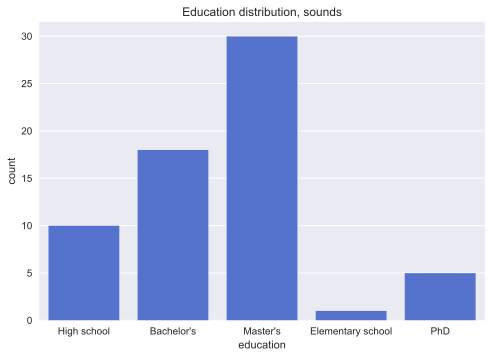

In [19]:
sns.countplot(df['education'], color="royalblue")
plt.title('Education distribution, sounds')
plt.show()

#### 9. Scores distribution

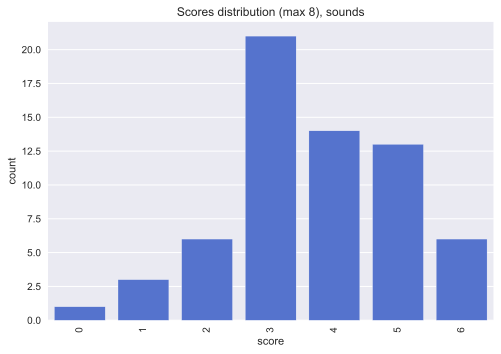

In [20]:
hist = sns.countplot(x = 'score',
              data = df,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Scores distribution (max 8), sounds")
plt.show()

### Questions

In [21]:
# Map scores
for q_i in range(1,8):
    for j in range(len(df["ts"])):
        if df["q"+str(q_i)][j] in ["Probably no","Definitely no"]:
            df["q"+str(q_i)][j] = 1
        else:
            df["q"+str(q_i)][j] = 0

for i in range(len(df["ts"])):
    if df["q8"][i] in ["Probably yes","Definitely yes"]:
        df["q8"][i] = 1
    else:
        df["q8"][i] = 0

C:\Users\Kirill\Anaconda3\envs\Py3_ICNS\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Kirill\Anaconda3\envs\Py3_ICNS\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Kirill\Anaconda3\envs\Py3_ICNS\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Kirill\Anacond

In [55]:
score_columns = ["q1","q2","q3","q4","q5","q6","q7","q8"]
wc_columns = ["wc1","wc2","wc3","wc4","wc5","wc6","wc7","wc8"]
speech_columns = ["q1","q2","q3","q4"]
piano_columns = ["q5","q6","q7","q8"]
questions_average = np.sum(df[score_columns], axis = 0)/df.shape[0]
print(questions_average)
print(df.shape[0])
questions_average = np.round(questions_average*100,2)
wc_average = np.sum(df[wc_columns], axis = 0)/df.shape[0]
wc_average = np.round(wc_average*100,2)

q1    0.484375
q2    0.312500
q3    0.375000
q4    0.515625
q5    0.593750
q6    0.515625
q7    0.390625
q8    0.484375
dtype: float64
64


### Scores by education level

In [40]:
masters_and_higher_df = df[df.education.isin(["Master's", "PhD"])]
bachelor_and_lower_df = df[~df.education.isin(["Master's", "PhD"])]

In [41]:
masters_and_higher_average = np.sum(masters_and_higher_df[score_columns], axis = 0)/masters_and_higher_df.shape[0]
masters_and_higher_average = np.round(masters_and_higher_average*100,2)

bachelor_and_lower_average = np.sum(bachelor_and_lower_df[score_columns], axis = 0)/bachelor_and_lower_df.shape[0]
bachelor_and_lower_average = np.round(bachelor_and_lower_average*100,2)

In [42]:
higher_score_aver = np.round(np.sum(masters_and_higher_df['score'])/masters_and_higher_df.shape[0],2)
lower_score_aver = np.round(np.sum(bachelor_and_lower_df['score'])/bachelor_and_lower_df.shape[0],2)

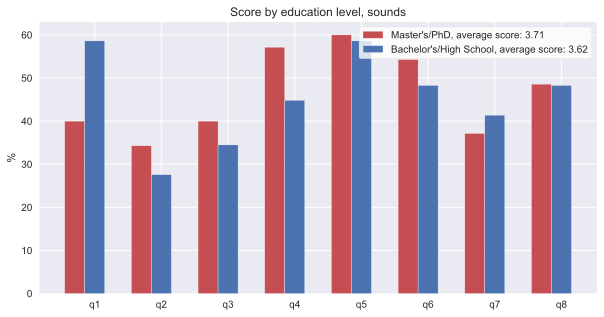

In [43]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_higher = ax.bar(ind, masters_and_higher_average, width, color='r')
bars_lower = ax.bar(ind+width, bachelor_and_lower_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(score_columns)
ax.legend( (bars_higher[0], bars_lower[0]), ("Master's/PhD, average score: " + str(higher_score_aver), "Bachelor's/High School, average score: " + str(lower_score_aver)) , frameon=True, facecolor='white')


plt.title("Score by education level, sounds")
plt.show()


### Scores by knowledge of AI

In [45]:
know_ai_df = df[df.studied_AI=='Yes']
not_know_ai_df = df[df.studied_AI=='No']

In [46]:
ai_score_aver = np.round(np.sum(know_ai_df['score'])/know_ai_df.shape[0],2)
not_ai_score_aver = np.round(np.sum(not_know_ai_df['score'])/not_know_ai_df.shape[0],2)

In [47]:
know_ai_average = np.sum(know_ai_df[score_columns], axis = 0)/know_ai_df.shape[0]
know_ai_average = np.round(know_ai_average*100,2)

not_know_ai_average = np.sum(not_know_ai_df[score_columns], axis = 0)/not_know_ai_df.shape[0]
not_know_ai_average = np.round(not_know_ai_average*100,2)

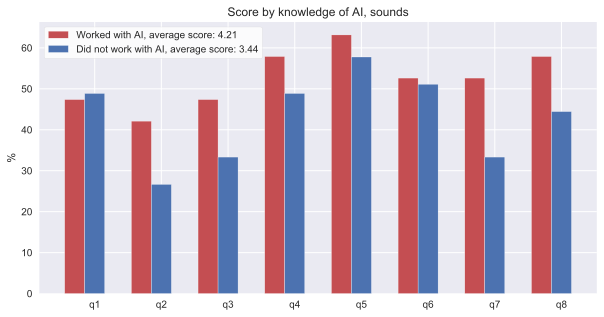

In [48]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_ai = ax.bar(ind, know_ai_average, width, color='r')
bars_not_ai = ax.bar(ind+width, not_know_ai_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(score_columns)
ax.legend( (bars_ai[0], bars_not_ai[0]), ('Worked with AI, average score: ' + str(ai_score_aver), 'Did not work with AI, average score: ' + str(not_ai_score_aver)) , frameon=True, facecolor='white')


plt.title("Score by knowledge of AI, sounds")
plt.show()

### Wisdom of crowd

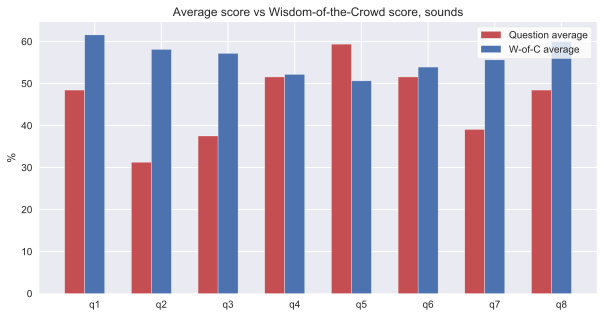

In [23]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_q = ax.bar(ind, questions_average, width, color='r')
bars_wc = ax.bar(ind+width, wc_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(score_columns)
ax.legend( (bars_q[0], bars_wc[0]), ('Question average', 'W-of-C average') , frameon=True, facecolor='white')


plt.title("Average score vs Wisdom-of-the-Crowd score, sounds")
plt.show()

### Speech

##### Question 1

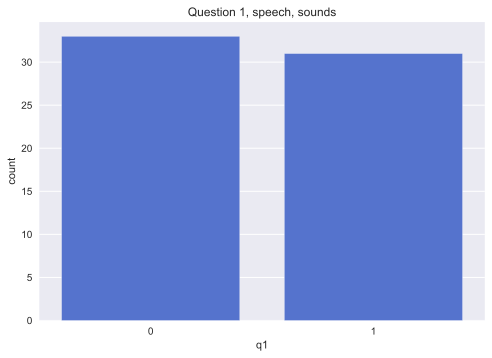

In [24]:
sns.countplot(df['q1'], color="royalblue")
plt.title('Question 1, speech, sounds')
plt.show()

##### Question 2

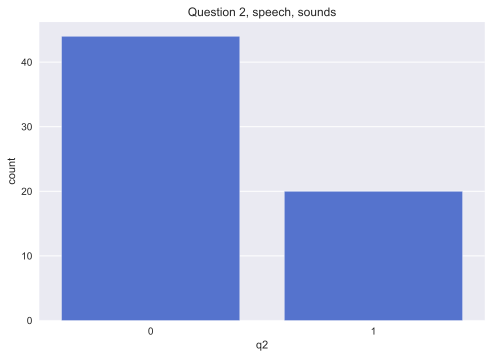

In [25]:
sns.countplot(df['q2'], color="royalblue")
plt.title('Question 2, speech, sounds')
plt.show()

##### Question 3

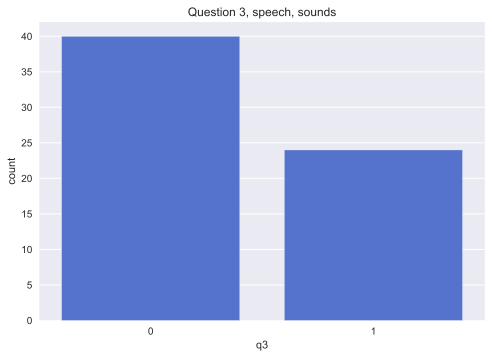

In [26]:
sns.countplot(df['q3'], color="royalblue")
plt.title('Question 3, speech, sounds')
plt.show()

##### Question 4

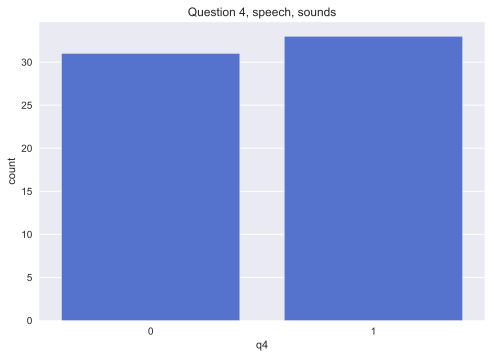

In [27]:
sns.countplot(df['q4'], color="royalblue")
plt.title('Question 4, speech, sounds')
plt.show()

In [28]:
adv_eng_df = df[df.english_level.isin(['Proficient/Advanced', 'Native'])]
not_adv_eng_df = df[~df.english_level.isin(['Proficient/Advanced', 'Native'])]

In [29]:
adv_eng_average = np.sum(adv_eng_df[speech_columns], axis = 0)/adv_eng_df.shape[0]
adv_eng_average = np.round(adv_eng_average*100,2)

In [30]:
not_adv_eng_average = np.sum(not_adv_eng_df[speech_columns], axis = 0)/not_adv_eng_df.shape[0]
not_adv_eng_average = np.round(not_adv_eng_average*100,2)

In [68]:
adv_eng_score_aver = sum(np.round(np.sum(adv_eng_df[speech_columns])/adv_eng_df.shape[0],2))
not_adv_eng_score_aver = sum(np.round(np.sum(not_adv_eng_df[speech_columns])/not_adv_eng_df.shape[0],2))

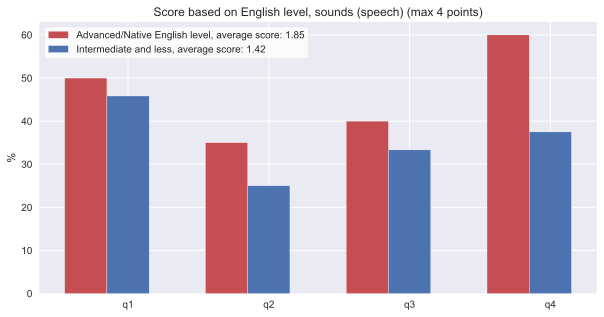

In [70]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_adv = ax.bar(ind, adv_eng_average, width, color='r')
bars_not_adv = ax.bar(ind+width, not_adv_eng_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(speech_columns)
ax.legend( (bars_adv[0], bars_not_adv[0]), ('Advanced/Native English level, average score: '+str(adv_eng_score_aver),
                                            'Intermediate and less, average score: '+str(not_adv_eng_score_aver)) , frameon=True, facecolor='white')


plt.title("Score based on English level, sounds (speech) (max 4 points)")
plt.show()


### Piano

##### Question 1

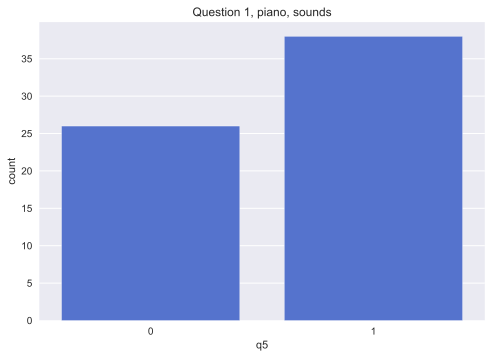

In [32]:
sns.countplot(df['q5'], color="royalblue")
plt.title('Question 1, piano, sounds')
plt.show()

##### Question 2

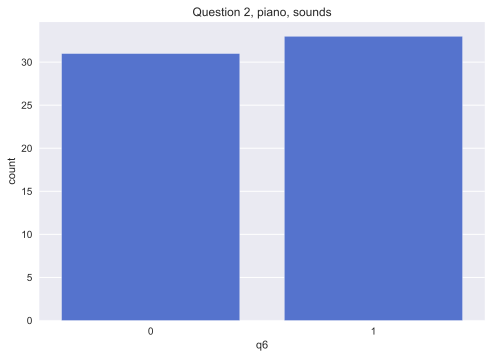

In [33]:
sns.countplot(df['q6'], color="royalblue")
plt.title('Question 2, piano, sounds')
plt.show()

##### Question 3

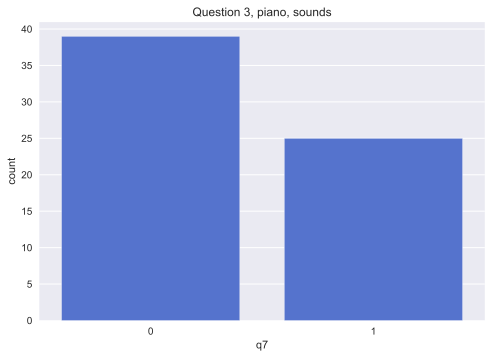

In [34]:
sns.countplot(df['q7'], color="royalblue")
plt.title('Question 3, piano, sounds')
plt.show()

##### Question 4

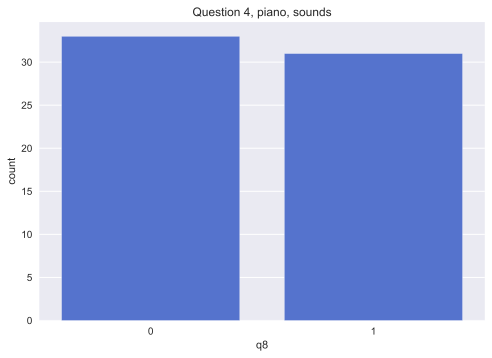

In [35]:
sns.countplot(df['q8'], color="royalblue")
plt.title('Question 4, piano, sounds')
plt.show()

In [56]:
music_no_df = df[df.music_level.isin(['No'])]
music_amateur_df = df[df.music_level.isin(['Yes (amateur)'])]
music_pro_df = df[df.music_level.isin(['Yes (professionally)'])]

In [57]:
music_no_average = np.sum(music_no_df[piano_columns], axis = 0)/music_no_df.shape[0]
music_no_average = np.round(music_no_average*100,2)

music_amateur_average = np.sum(music_amateur_df[piano_columns], axis = 0)/music_amateur_df.shape[0]
music_amateur_average = np.round(music_amateur_average*100,2)

music_pro_average = np.sum(music_pro_df[piano_columns], axis = 0)/music_pro_df.shape[0]
music_pro_average = np.round(music_pro_average*100,2)

In [66]:
music_no_aver = sum(np.round(np.sum(music_no_df[piano_columns])/music_no_df.shape[0],2))
music_amateur_aver = sum(np.round(np.sum(music_amateur_df[piano_columns])/music_amateur_df.shape[0],2))
music_pro_aver = sum(np.round(np.sum(music_pro_df[piano_columns])/music_pro_df.shape[0],2))

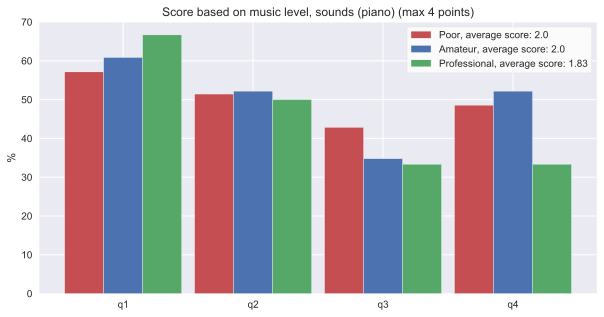

In [67]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_no = ax.bar(ind, music_no_average, width, color='r')
bars_amateur = ax.bar(ind+width, music_amateur_average, width, color='b')
bars_pro = ax.bar(ind+width*2, music_pro_average, width, color='g')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(speech_columns)
ax.legend( (bars_no[0], bars_amateur[0],bars_pro[0]), ('Poor, average score: '+str(music_no_aver),
                                                       'Amateur, average score: '+str(music_amateur_aver),
                                                       "Professional, average score: "+str(music_pro_aver)) , frameon=True, facecolor='white')


plt.title("Score based on music level, sounds (piano) (max 4 points)")
plt.show()